Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64
Accuracy: 0.850583538083538
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4912
           1       0.73      0.62      0.67      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512



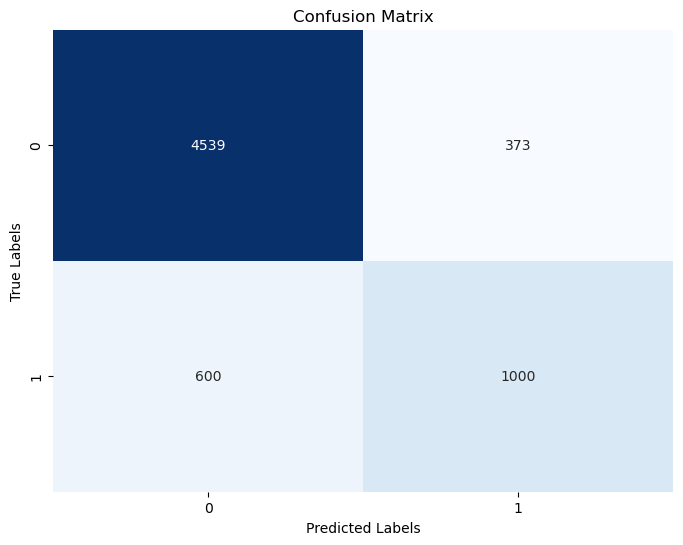

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"
data = pd.read_csv(url)

print(data.isnull().sum())

label_encoder = LabelEncoder()

data['Income'] = label_encoder.fit_transform(data['Income'])

X = data.drop(['Income'], axis=1)
y = data['Income']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  3

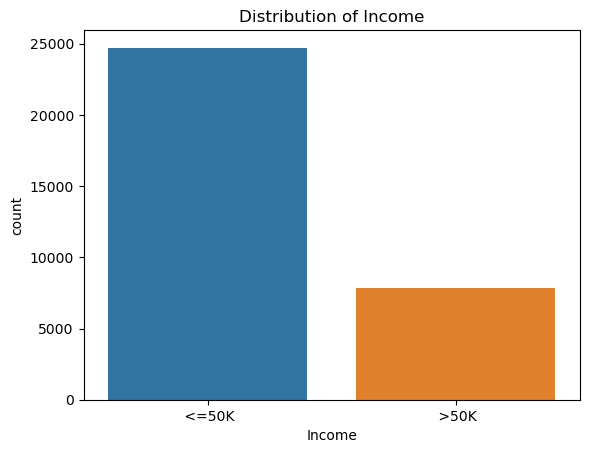

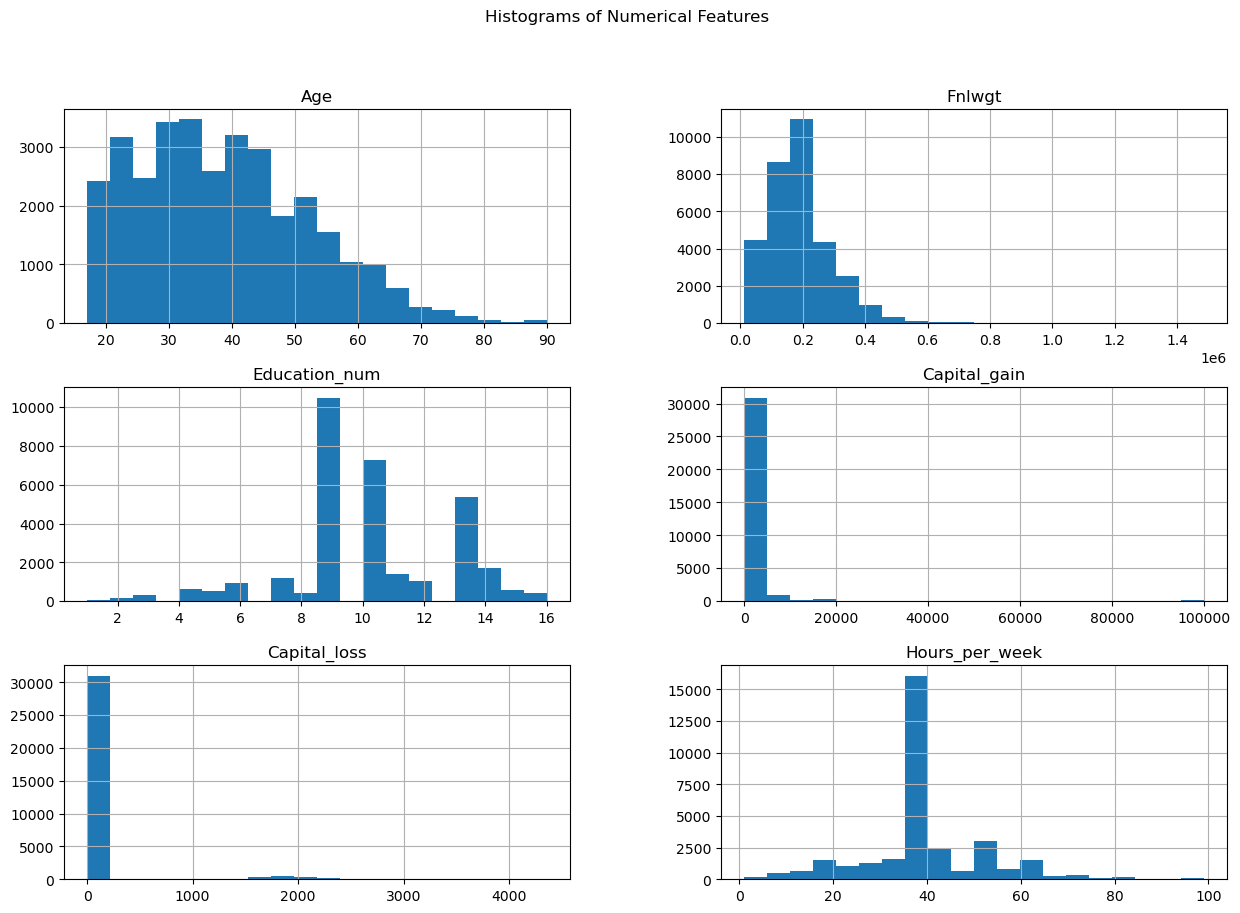

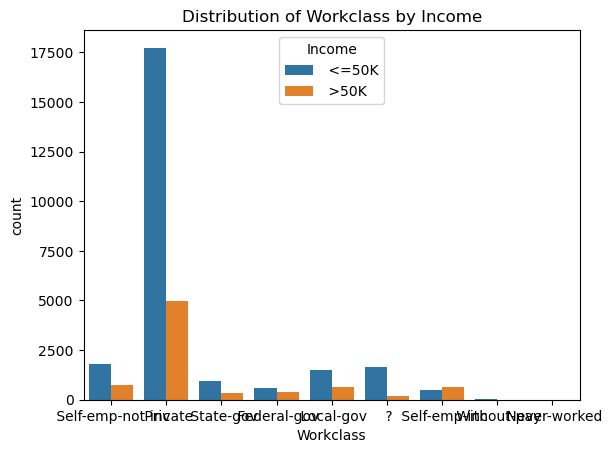

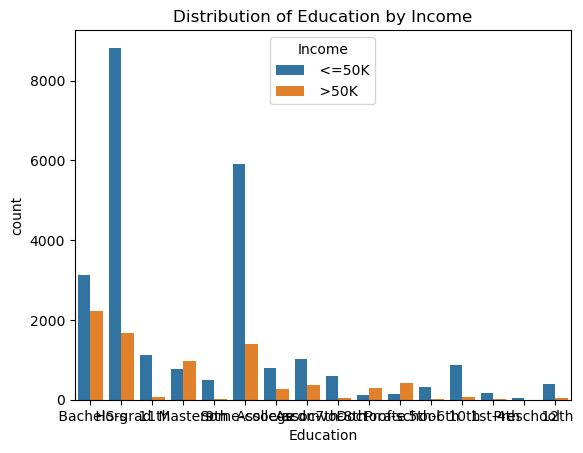

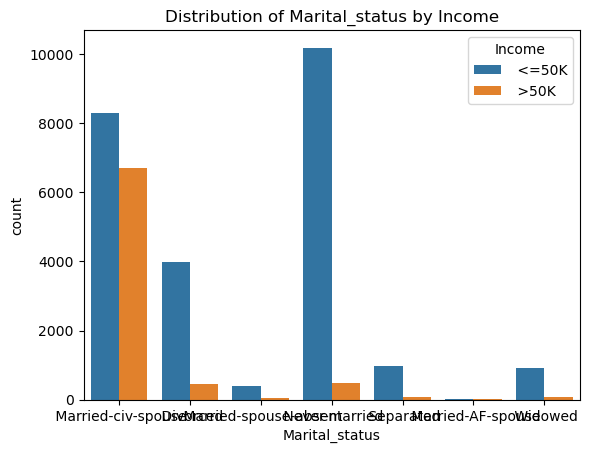

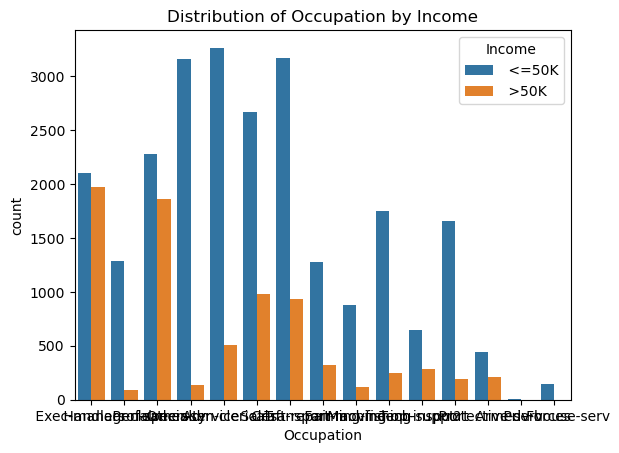

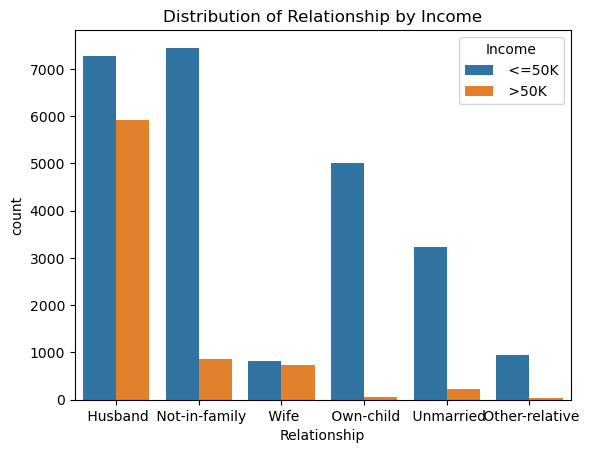

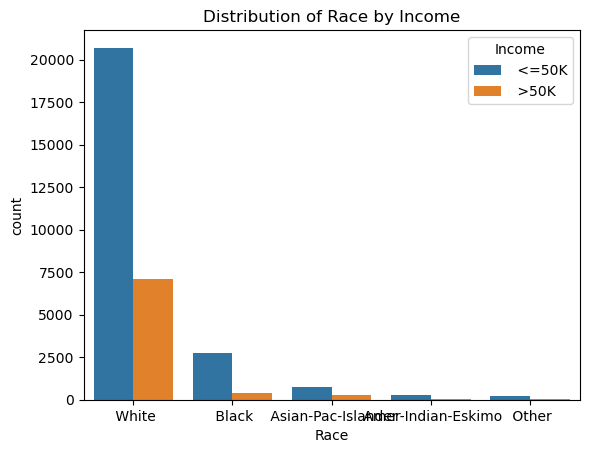

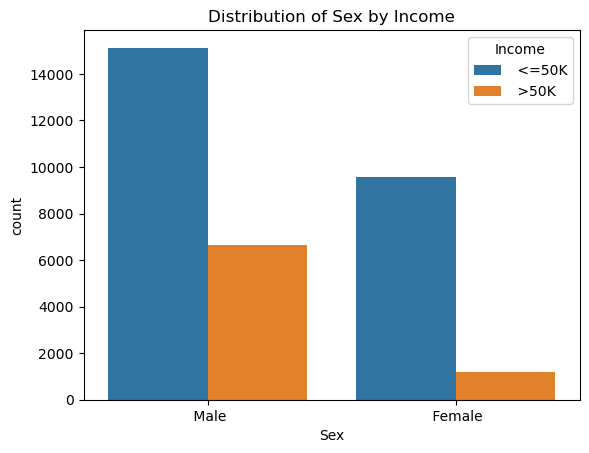

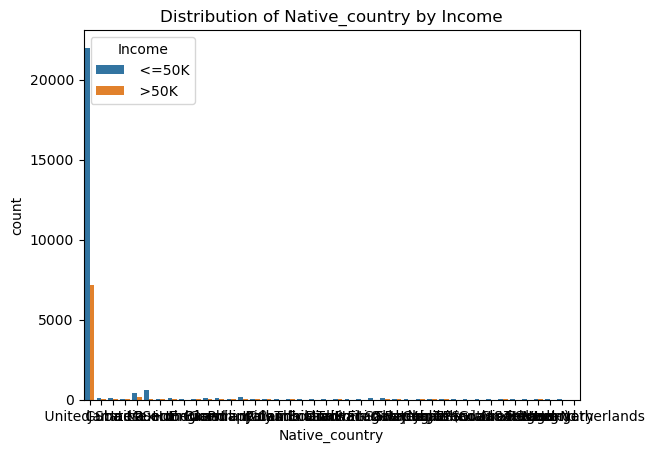

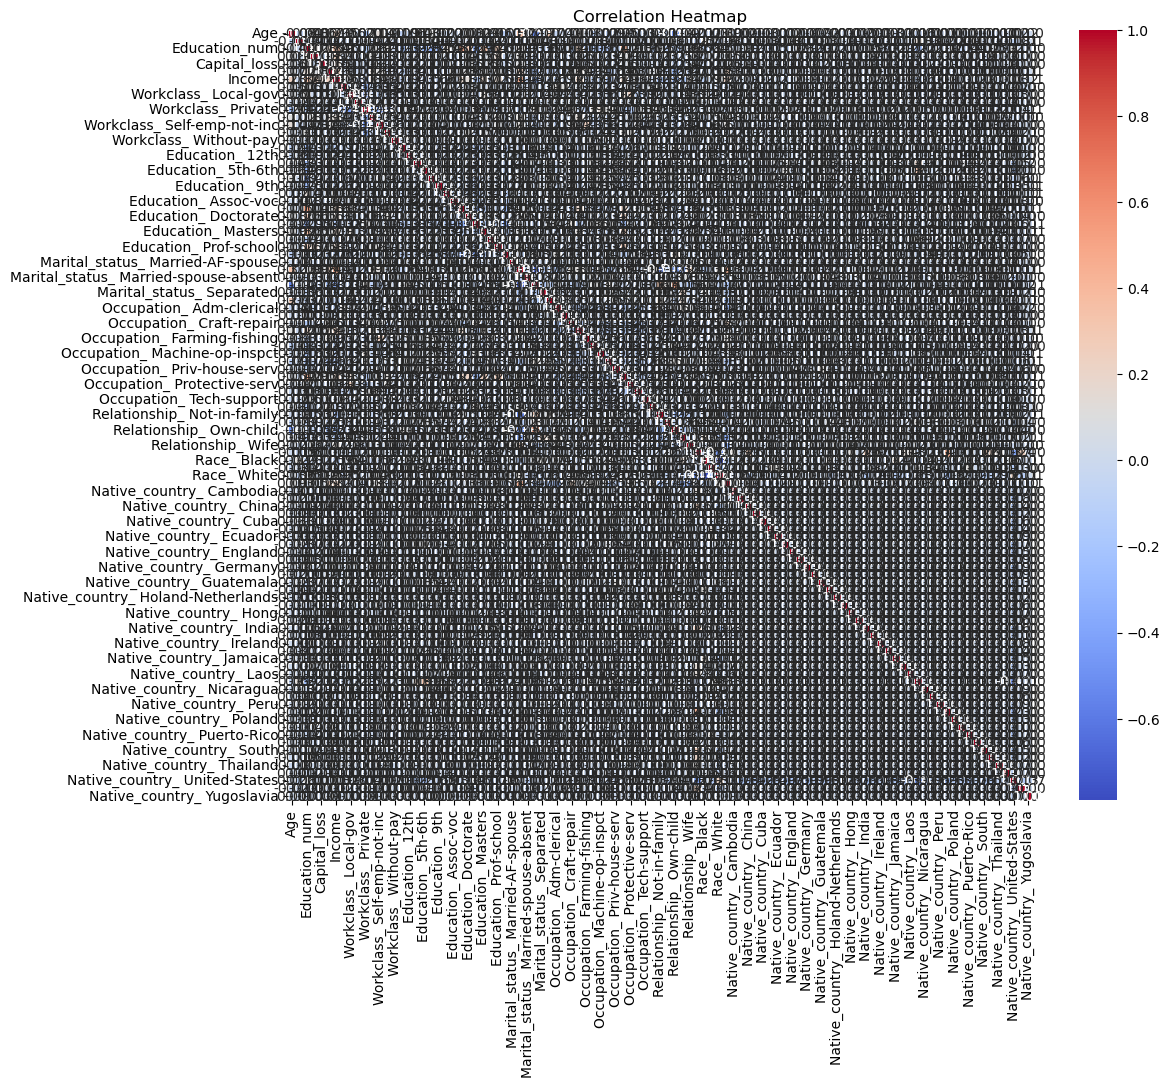

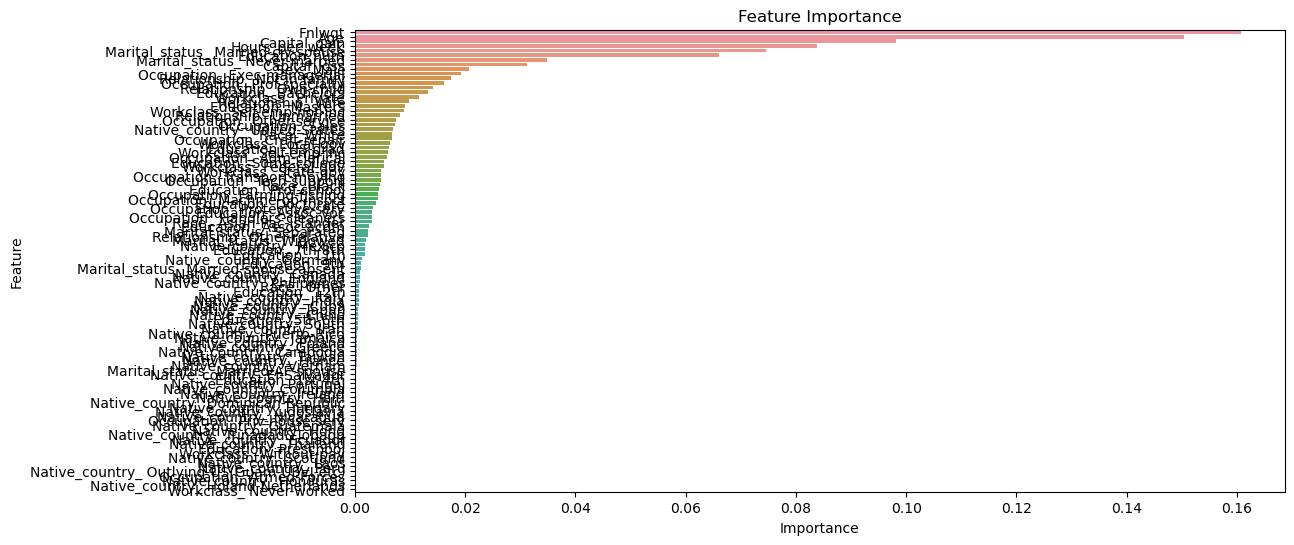

Accuracy: 0.851965601965602
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4912
           1       0.73      0.63      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512



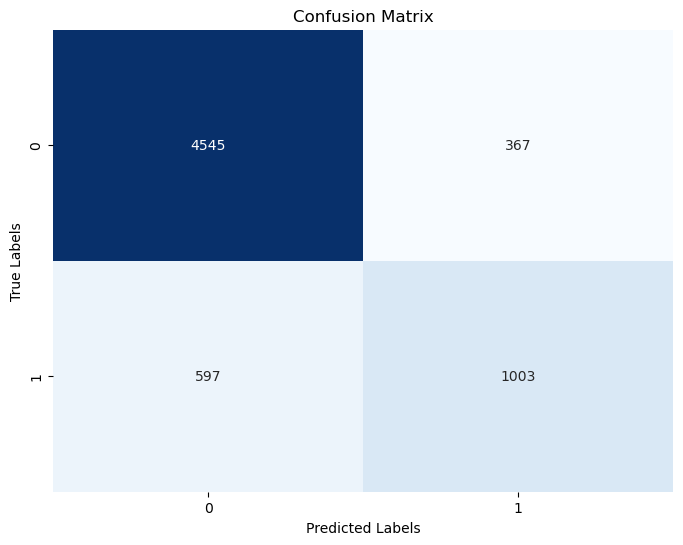

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"
data = pd.read_csv(url)

print(data.info())

print(data.describe())

print("Missing values:\n", data.isnull().sum())

sns.countplot(x='Income', data=data)
plt.title('Distribution of Income')
plt.show()

numerical_features = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

categorical_features = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Income', data=data)
    plt.title(f'Distribution of {feature} by Income')
    plt.show()

label_encoder = LabelEncoder()
data['Income'] = label_encoder.fit_transform(data['Income'])

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

X = data.drop(['Income'], axis=1)
y = data['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

random_forest_model = RandomForestClassifier(random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_rep_rf)
print("Confusion Matrix:")
print(confusion_mat_rf)


Random Forest Model:
Accuracy: 0.851965601965602
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4912
           1       0.73      0.63      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512

Confusion Matrix:
[[4545  367]
 [ 597 1003]]


In [20]:
from sklearn.model_selection import cross_val_score

random_forest_model = RandomForestClassifier(random_state=42)

cv_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Model:")
print("Cross-Validation Scores:", cv_scores_rf)
print(f"Average Cross-Validation Score: {np.mean(cv_scores_rf)}")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_rep_rf)
print("Confusion Matrix:")
print(confusion_mat_rf)


Random Forest Model:
Cross-Validation Scores: [0.85220729 0.85316699 0.85316699 0.85275485 0.85525053]
Average Cross-Validation Score: 0.8533093284213171
Accuracy: 0.851965601965602
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4912
           1       0.73      0.63      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512

Confusion Matrix:
[[4545  367]
 [ 597 1003]]


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier(random_state=42)

gradient_boosting_model.fit(X_train, y_train)

y_pred_gb = gradient_boosting_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting Model:")
print(f"Accuracy: {accuracy_gb}")
print("Classification Report:")
print(classification_rep_gb)
print("Confusion Matrix:")
print(confusion_mat_gb)


Gradient Boosting Model:
Accuracy: 0.8696253071253072
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4912
           1       0.80      0.63      0.70      1600

    accuracy                           0.87      6512
   macro avg       0.84      0.79      0.81      6512
weighted avg       0.86      0.87      0.86      6512

Confusion Matrix:
[[4656  256]
 [ 593 1007]]


In [21]:
from sklearn.model_selection import cross_val_score

gradient_boosting_model = GradientBoostingClassifier(random_state=42)

cv_scores_gb = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5)

gradient_boosting_model.fit(X_train, y_train)

y_pred_gb = gradient_boosting_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting Model:")
print("Cross-Validation Scores:", cv_scores_gb)
print(f"Average Cross-Validation Score: {np.mean(cv_scores_gb)}")
print(f"Accuracy: {accuracy_gb}")
print("Classification Report:")
print(classification_rep_gb)
print("Confusion Matrix:")
print(confusion_mat_gb)


Gradient Boosting Model:
Cross-Validation Scores: [0.8696737  0.86756238 0.86449136 0.86216164 0.86830486]
Average Cross-Validation Score: 0.8664387895009706
Accuracy: 0.8696253071253072
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4912
           1       0.80      0.63      0.70      1600

    accuracy                           0.87      6512
   macro avg       0.84      0.79      0.81      6512
weighted avg       0.86      0.87      0.86      6512

Confusion Matrix:
[[4656  256]
 [ 593 1007]]


In [17]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)

logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)
confusion_mat_logistic = confusion_matrix(y_test, y_pred_logistic)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:")
print(classification_rep_logistic)
print("Confusion Matrix:")
print(confusion_mat_logistic)


Logistic Regression Model:
Accuracy: 0.8531941031941032
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4912
           1       0.74      0.63      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512

Confusion Matrix:
[[4554  358]
 [ 598 1002]]


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.model_selection import cross_val_score

logistic_model = LogisticRegression(random_state=42)

cv_scores_logistic = cross_val_score(logistic_model, X_train, y_train, cv=5)

logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)
confusion_mat_logistic = confusion_matrix(y_test, y_pred_logistic)

print("Logistic Regression Model:")
print("Cross-Validation Scores:", cv_scores_logistic)
print(f"Average Cross-Validation Score: {np.mean(cv_scores_logistic)}")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:")
print(classification_rep_logistic)
print("Confusion Matrix:")
print(confusion_mat_logistic)


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Model:
Cross-Validation Scores: [0.8537428  0.85412668 0.8487524  0.85256287 0.85006719]
Average Cross-Validation Score: 0.8518503888699943
Accuracy: 0.8531941031941032
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4912
           1       0.74      0.63      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.85      0.85      6512

Confusion Matrix:
[[4554  358]
 [ 598 1002]]


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)

print("Support Vector Machine Model:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:")
print(classification_rep_svm)
print("Confusion Matrix:")
print(confusion_mat_svm)


Support Vector Machine Model:
Accuracy: 0.8558046683046683
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4912
           1       0.76      0.60      0.67      1600

    accuracy                           0.86      6512
   macro avg       0.82      0.77      0.79      6512
weighted avg       0.85      0.86      0.85      6512

Confusion Matrix:
[[4608  304]
 [ 635  965]]


In [23]:
from sklearn.model_selection import cross_val_score

svm_model = SVC(random_state=42)

cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)

print("Support Vector Machine Model:")
print("Cross-Validation Scores:", cv_scores_svm)
print(f"Average Cross-Validation Score: {np.mean(cv_scores_svm)}")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:")
print(classification_rep_svm)
print("Confusion Matrix:")
print(confusion_mat_svm)


Support Vector Machine Model:
Cross-Validation Scores: [0.85451056 0.86180422 0.85412668 0.8531388  0.85448263]
Average Cross-Validation Score: 0.8556125766381749
Accuracy: 0.8558046683046683
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4912
           1       0.76      0.60      0.67      1600

    accuracy                           0.86      6512
   macro avg       0.82      0.77      0.79      6512
weighted avg       0.85      0.86      0.85      6512

Confusion Matrix:
[[4608  304]
 [ 635  965]]


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)

print("k-Nearest Neighbors Model:")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_rep_knn)
print("Confusion Matrix:")
print(confusion_mat_knn)


k-Nearest Neighbors Model:
Accuracy: 0.8313882063882064
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4912
           1       0.67      0.61      0.64      1600

    accuracy                           0.83      6512
   macro avg       0.77      0.76      0.76      6512
weighted avg       0.83      0.83      0.83      6512

Confusion Matrix:
[[4439  473]
 [ 625  975]]


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
from sklearn.model_selection import cross_val_score

knn_model = KNeighborsClassifier()

cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)

print("k-Nearest Neighbors Model:")
print("Cross-Validation Scores:", cv_scores_knn)
print(f"Average Cross-Validation Score: {np.mean(cv_scores_knn)}")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_rep_knn)
print("Confusion Matrix:")
print(confusion_mat_knn)



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

k-Nearest Neighbors Model:
Cross-Validation Scores: [0.83147793 0.83474088 0.83090211 0.83374928 0.83451718]
Average Cross-Validation Score: 0.833077476639612
Accuracy: 0.8313882063882064
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4912
           1       0.67      0.61      0.64      1600

    accuracy                           0.83      6512
   macro avg       0.77      0.76      0.76      6512
weighted avg       0.83      0.83      0.83      6512

Confusion Matrix:
[[4439  473]
 [ 625  975]]


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred_rf_tuned = best_rf_model.predict(X_test)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
classification_rep_rf_tuned = classification_report(y_test, y_pred_rf_tuned)
confusion_mat_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Model:")
print("Best Parameters:", best_params_rf)
print(f"Accuracy: {accuracy_rf_tuned}")
print("Classification Report:")
print(classification_rep_rf_tuned)
print("Confusion Matrix:")
print(confusion_mat_rf_tuned)


Tuned Random Forest Model:
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.8662469287469288
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4912
           1       0.78      0.63      0.70      1600

    accuracy                           0.87      6512
   macro avg       0.83      0.79      0.81      6512
weighted avg       0.86      0.87      0.86      6512

Confusion Matrix:
[[4631  281]
 [ 590 1010]]


In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

best_rf_model_pca = grid_search_rf.best_estimator_
best_rf_model_pca.fit(X_train_pca, y_train)

y_pred_rf_pca = best_rf_model_pca.predict(X_test_pca)

accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
classification_rep_rf_pca = classification_report(y_test, y_pred_rf_pca)
confusion_mat_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)

print("Tuned Random Forest Model with PCA:")
print(f"Accuracy: {accuracy_rf_pca}")
print("Classification Report:")
print(classification_rep_rf_pca)
print("Confusion Matrix:")
print(confusion_mat_rf_pca)


Tuned Random Forest Model with PCA:
Accuracy: 0.8496621621621622
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4912
           1       0.74      0.60      0.66      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.78      6512
weighted avg       0.84      0.85      0.84      6512

Confusion Matrix:
[[4565  347]
 [ 632  968]]


Tuned Random Forest Model:
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.8647113022113022
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      4912
        >50K       0.77      0.64      0.70      1600

    accuracy                           0.86      6512
   macro avg       0.83      0.79      0.81      6512
weighted avg       0.86      0.86      0.86      6512

Confusion Matrix:
[[4613  299]
 [ 582 1018]]


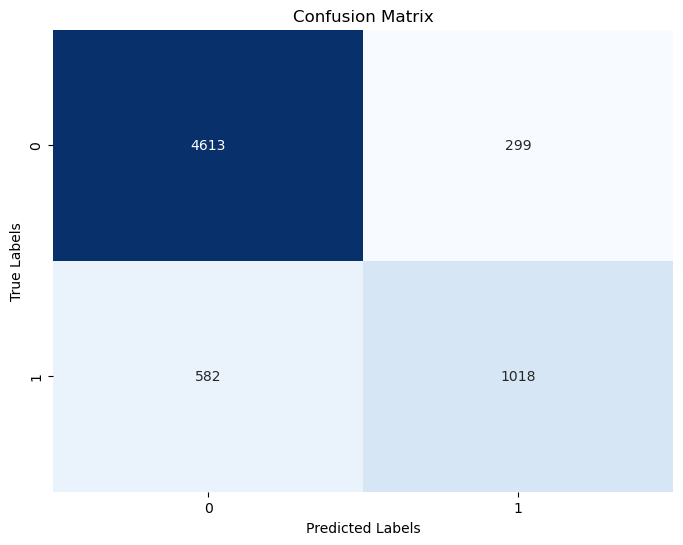

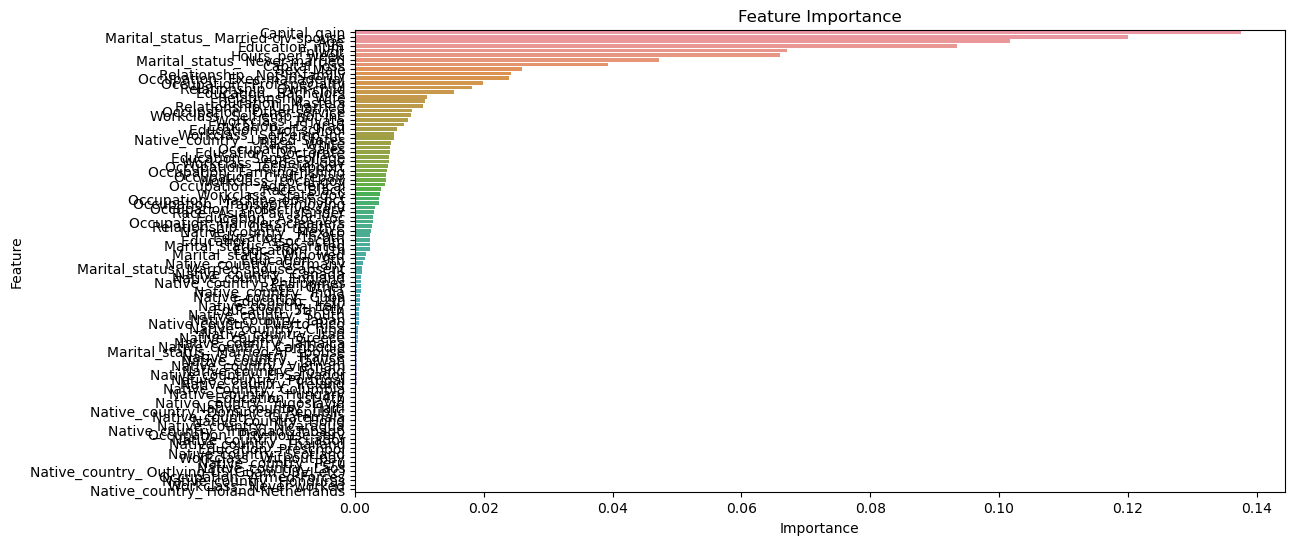

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"
data = pd.read_csv(url)

X = data.drop('Income', axis=1)
y = data['Income']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred_rf_tuned = best_rf_model.predict(X_test)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
classification_rep_rf_tuned = classification_report(y_test, y_pred_rf_tuned)
confusion_mat_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Model:")
print("Best Parameters:", best_params_rf)
print(f"Accuracy: {accuracy_rf_tuned}")
print("Classification Report:")
print(classification_rep_rf_tuned)
print("Confusion Matrix:")
print(confusion_mat_rf_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"
data = pd.read_csv(url)

X = data.drop('Income', axis=1)
y = data['Income']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search_logistic = GridSearchCV(LogisticRegression(random_state=42), param_grid_logistic, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logistic.fit(X_train, y_train)

best_params_logistic = grid_search_logistic.best_params_

best_logistic_model = grid_search_logistic.best_estimator_
best_logistic_model.fit(X_train, y_train)

y_pred_logistic_tuned = best_logistic_model.predict(X_test)

accuracy_logistic_tuned = accuracy_score(y_test, y_pred_logistic_tuned)
classification_rep_logistic_tuned = classification_report(y_test, y_pred_logistic_tuned)
confusion_mat_logistic_tuned = confusion_matrix(y_test, y_pred_logistic_tuned)

print("Tuned Logistic Regression Model:")
print("Best Parameters:", best_params_logistic)
print(f"Accuracy: {accuracy_logistic_tuned}")
print("Classification Report:")
print(classification_rep_logistic_tuned)
print("Confusion Matrix:")
print(confusion_mat_logistic_tuned)

model_filename = 'best_logistic_regression_model.joblib'
joblib.dump(best_logistic_model, model_filename)


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sv697\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Tuned Logistic Regression Model:
Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.7977579852579852
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      4912
        >50K       0.74      0.27      0.40      1600

    accuracy                           0.80      6512
   macro avg       0.77      0.62      0.64      6512
weighted avg       0.79      0.80      0.76      6512

Confusion Matrix:
[[4761  151]
 [1166  434]]


['best_logistic_regression_model.joblib']